# World Happiness Report

As per the report there are in total 155 countries which are given happiness rank and score based on different different parameters like GDP,Family,Health,Freedom,Trust,Generosity and dystopia residual

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [156]:
df=pd.read_csv('happiness_score.csv')

In [157]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [158]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

As the country and Region are having object datatype the same needs to be converted into int64 for Machine learning using label encode

In [159]:
df.shape

(158, 12)

There are 158 records(rows) and 12 columns the target/label here is happiness score

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

There are no null values in any of the columns

In [161]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

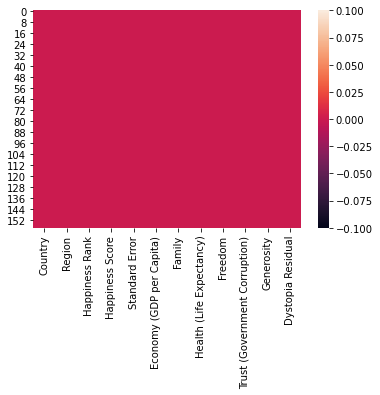

In [162]:
sns.heatmap(df.isnull())

In [163]:
le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'])
df['Region']=le.fit_transform(df['Region'])

In [164]:
pd.set_option('display.max_rows',None)
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Skewness is present in some of the columns which needs to be corrected specifically in Economy(GDP per Capita) median is greater than mean it is left skewed data.The outliers needs to be checked looking at the data it seems there are no outliers from the first obeservation but it needs to be verified.

In [165]:
x=df.drop('Happiness Rank',axis=1)

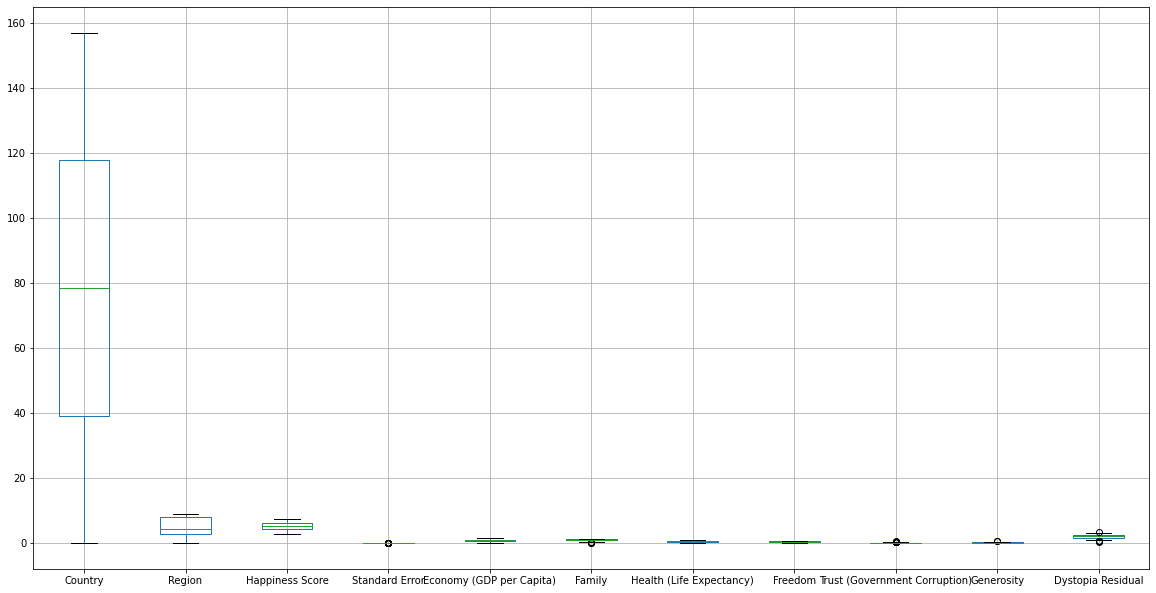

In [166]:
x.boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=0.10)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2bc87619b50>,
 'caps': [<matplotlib.lines.Line2D at 0x2bc871d6250>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bc876197f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2bc871d6910>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bc871d6c70>],
 'means': []}

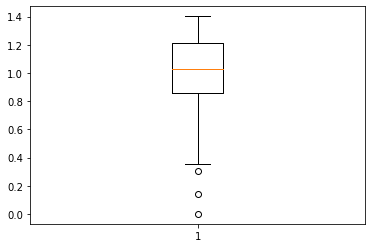

In [167]:
plt.boxplot(df['Family'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2bc8722abe0>,
 'caps': [<matplotlib.lines.Line2D at 0x2bc872362e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bc8722a880>],
 'medians': [<matplotlib.lines.Line2D at 0x2bc872369a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bc87236d00>],
 'means': []}

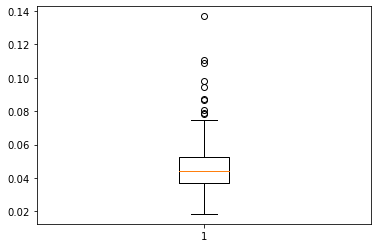

In [168]:
# univariate analysis
plt.boxplot(df['Standard Error'])

plt.boxplot(df['Trust (Government Corruption)'])

In [169]:
z=np.abs(zscore(df))

In [170]:
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))

Not removing outliers is the best option as they are less in quantity and they are very close to whiskers. Further, removing the outliers will result in entire row removals where outliers is there and additionally it is a loss of data

In [171]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


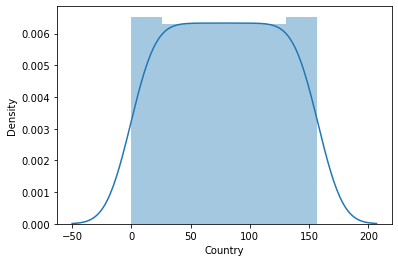

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


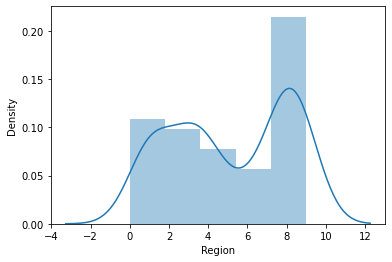

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


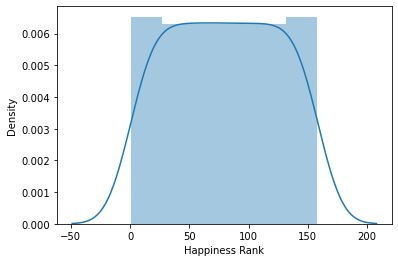

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


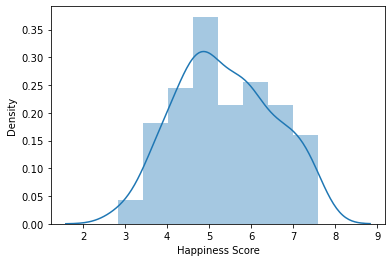

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


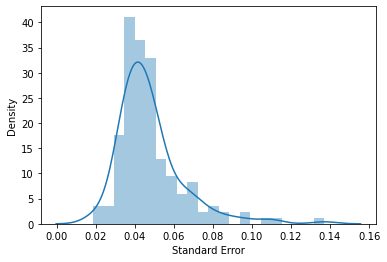

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


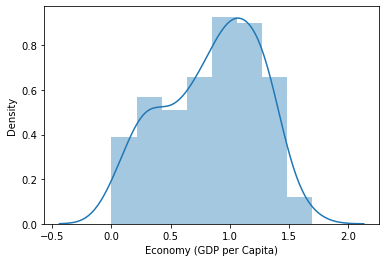

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


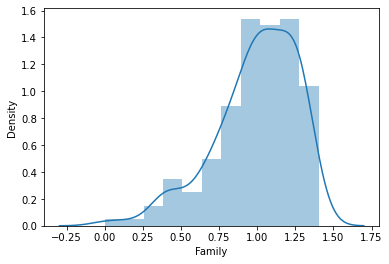

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


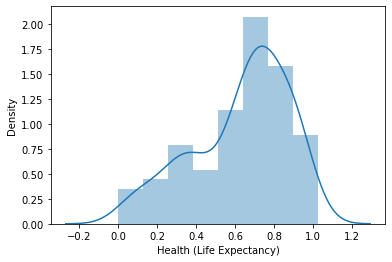

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


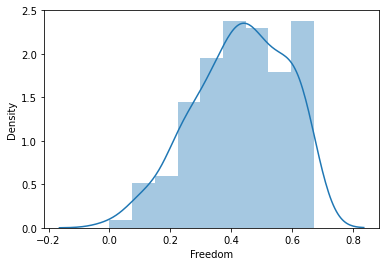

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


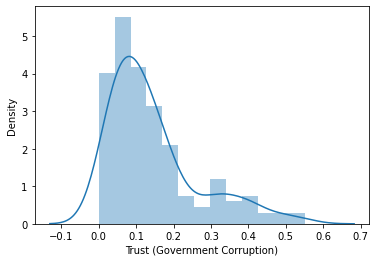

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


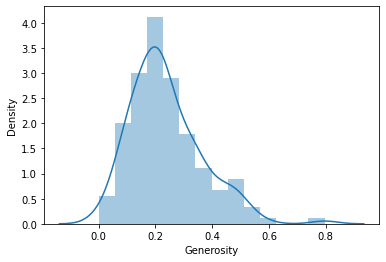

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


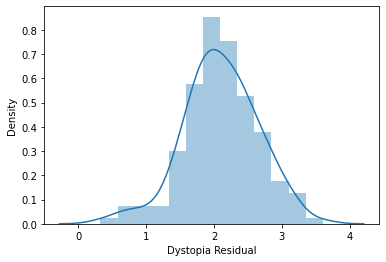

In [172]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])
    plt.show()

In [173]:
from sklearn.preprocessing import power_transform
df['Standard Error']=power_transform(df['Standard Error'].values.reshape(-1,1))
df['Family']=power_transform(df['Family'].values.reshape(-1,1))
df['Health (Life Expectancy)']=power_transform(df['Health (Life Expectancy)'].values.reshape(-1,1))
df['Trust (Government Corruption)']=power_transform(df['Trust (Government Corruption)'].values.reshape(-1,1))
df['Generosity']=power_transform(df['Generosity'].values.reshape(-1,1))
df['Economy (GDP per Capita)']=power_transform(df['Economy (GDP per Capita)'].values.reshape(-1,1))

In [174]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.413462
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual               -0.238911
dtype: float64

 we have removed skewness from the data where skewness was found greater than 0.5

In [175]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.013630,0.040730,0.141419,0.027141,0.085684,0.044136,0.124585,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.075395,-0.234924,-0.134083,-0.288460,0.092567,0.212647,0.300229,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.202484,-0.789485,-0.768870,-0.757843,-0.556886,-0.318103,-0.159168,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.222188,0.786155,0.773908,0.749896,0.568211,0.338561,0.178763,0.530474
Standard Error,0.013630,-0.075395,0.202484,-0.222188,1.000000,-0.222983,-0.189263,-0.318546,-0.186313,-0.156602,-0.100144,0.035111
Economy (GDP per Capita),0.040730,-0.234924,-0.789485,0.786155,-0.222983,1.000000,0.664303,0.837997,0.382304,0.240867,-0.017409,0.042431
Family,0.141419,-0.134083,-0.768870,0.773908,-0.189263,0.664303,1.000000,0.581167,0.502414,0.188079,0.126712,0.172593
Health (Life Expectancy),0.027141,-0.288460,-0.757843,0.749896,-0.318546,0.837997,0.581167,1.000000,0.382351,0.187954,0.097270,0.036249
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.186313,0.382304,0.502414,0.382351,1.000000,0.464543,0.395684,0.062783
Trust (Government Corruption),0.044136,0.212647,-0.318103,0.338561,-0.156602,0.240867,0.188079,0.187954,0.464543,1.000000,0.266287,0.010689


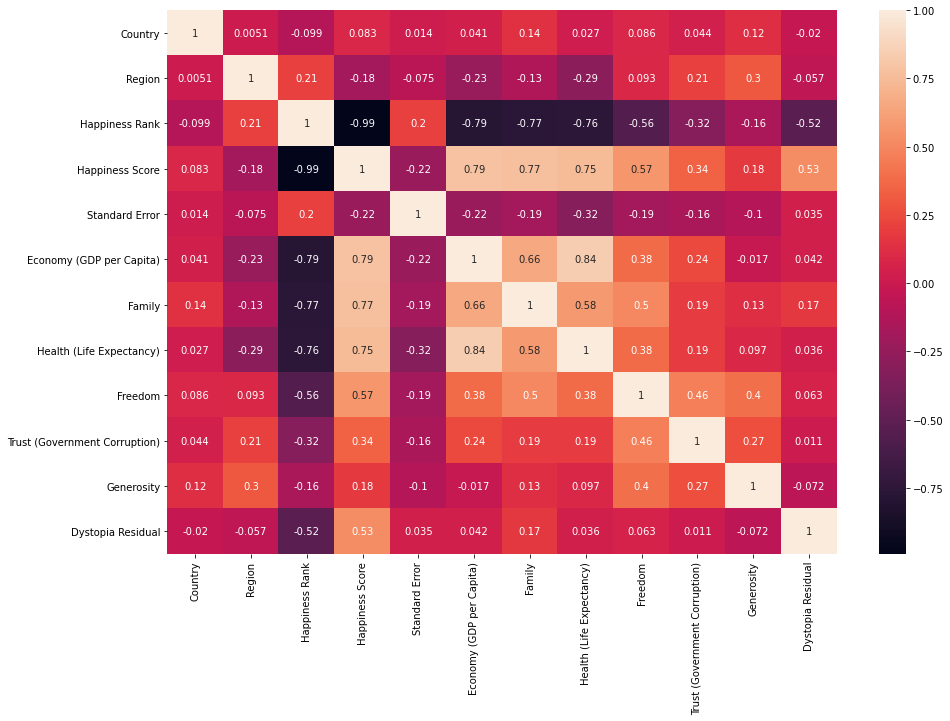

In [176]:
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(),annot=True)
plt.show()

From the above correlation map it can be said that happiness score is having less correlation with Standard error and generosity. Further, based on the correlation both of the columns can be dropped but one should avoid dropping of columns as it may result in data loss.

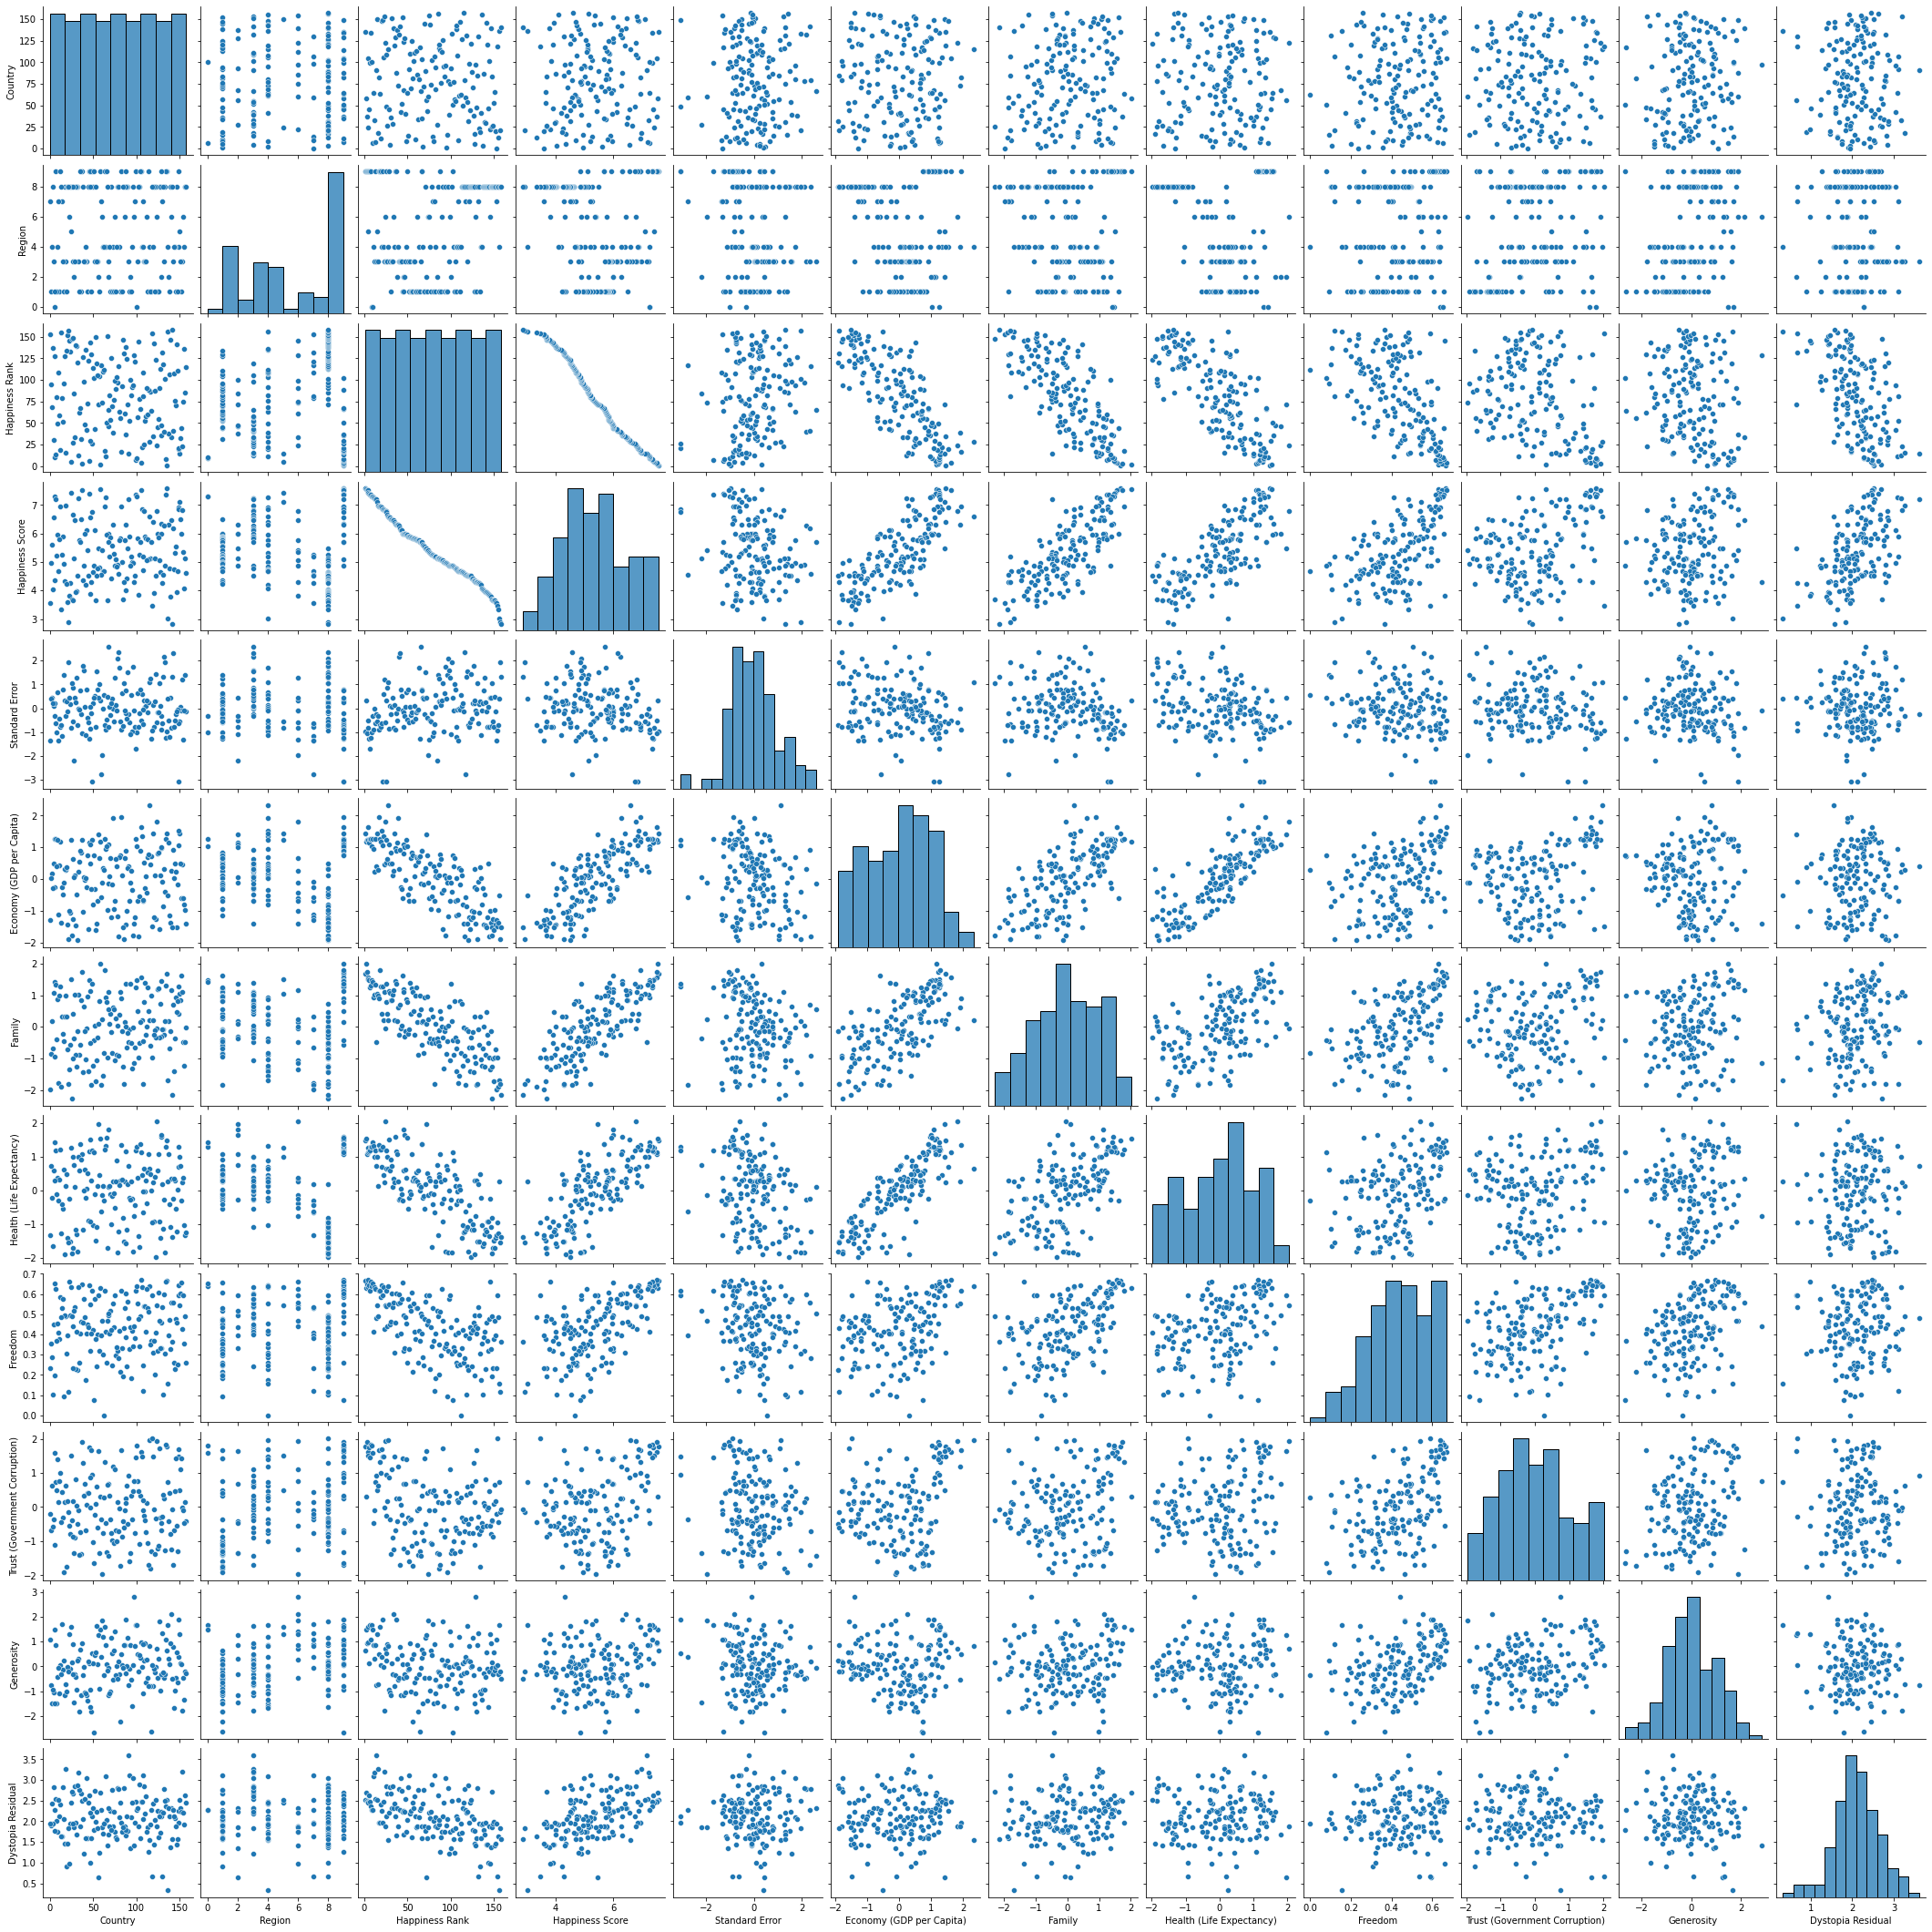

In [177]:
# multivariate analysis
sns.pairplot(df)

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

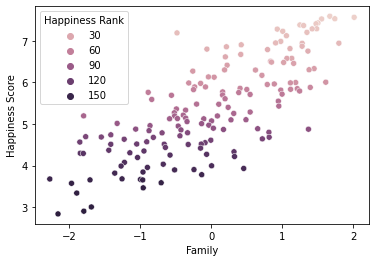

In [178]:
#Bivariate analysis
sns.scatterplot(x='Family',y='Happiness Score',hue='Happiness Rank',data=df)

 There is a positive relationship between family and happiness score

In [179]:
x=df.drop('Happiness Score',axis=1)

In [180]:
y=df['Happiness Score']

In [181]:
se=StandardScaler()
x=se.fit_transform(x)

In [182]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40)


In [183]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

0.9944927264890706
0.9954764538623949
0.056265793263906905
0.005957133607329593
0.07718246955967134


In [184]:
score=r2_score(y_test,pred)
print(score)

0.9954764538623949


In [185]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

0.04535416666666661
0.003629937499999996
0.06024896264667132


In [186]:
score=r2_score(y_test,pred)
print(score)

0.997243608950172


There may be a problem of overfitting in this model it has to be verified by cross_val_score to find the best model.

In [187]:
score=cross_val_score(lr,x,y,cv=5)
print(score.mean())

0.8497480011031276


In [193]:
le=Lasso(alpha=0.001)
le.fit(x_train,y_train)
pred=le.predict(x_test)
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

0.05749117058696651
0.006049902548018386
0.07778111948293355


In [194]:
score=r2_score(y_test,pred)
print(score)

0.9954060098181609


In [195]:
re=Ridge(alpha=0.00001)
re.fit(x_train,y_train)
pred=re.predict(x_test)
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

0.05626578985877831
0.005957132455928725
0.0771824621007177


In [196]:
score=r2_score(y_test,pred)
print(score)

0.9954764547367105


Linear Regression is the best model among all to verify the probelm of overfitting lasso and ridge has been applied and we are getting the same r2 score